<a href="https://colab.research.google.com/github/mmucahitkaya/World-Happiness-Report-2020/blob/main/World%20Happiness%20Report%202020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# World Happiness Report 2020

###Intro to Resarch Methode

I will compare the happiness score based on the gross domestic product and examine whether there is a correlation.

In [ ]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
from scipy import stats
import plotly.tools as tools
from plotly.tools import FigureFactory as FF
import scipy

In [ ]:
#Read CSV
df2020 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/WHR20_DataForFigure2.1.csv")

In [ ]:
#Change Column Names
dw2020 = df2020[ ["Country name","Regional indicator","Ladder score","Logged GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"] ]
a = ['Land','Region','GlueckPunktzahl','Wirtschaft','Sozialhilfe','Gesundheit','Freiheit','Grosszuegigkeit','WahrnehmungvonKorruption']
dw2020.columns = a

#Dataset Informations

In [ ]:
#Top 5 countries with the highest happiness score
dw2020.head()

,Land,Region,GlueckPunktzahl,Wirtschaft,Sozialhilfe,Gesundheit,Freiheit,Grosszuegigkeit,WahrnehmungvonKorruption
0,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218


In [ ]:
#Top 5 countries with the lowest happiness score
dw2020.tail()

,Land,Region,GlueckPunktzahl,Wirtschaft,Sozialhilfe,Gesundheit,Freiheit,Grosszuegigkeit,WahrnehmungvonKorruption
148,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417
152,Afghanistan,South Asia,2.5669,7.462861,0.470367,52.590000,0.396573,-0.096429,0.933687


In [ ]:
#Variable Types
dw2020.dtypes

Land                         object
Region                       object
GlueckPunktzahl             float64
Wirtschaft                  float64
Sozialhilfe                 float64
Gesundheit                  float64
Freiheit                    float64
Grosszuegigkeit             float64
WahrnehmungvonKorruption    float64
dtype: object

#Central Tendency and Variability

I calculated tendency, standard deviation, quarter 1, quarter 2, quarter 3, min max values and range

In [ ]:
#in worldwide calculating central tendency, standard deviation, quarter 1, quarter 2, quarter 3, min max values and range
dekonomi = dw2020.Wirtschaft.describe() 
dsosyaldestek = dw2020.Sozialhilfe.describe()
dsaglik = dw2020.Gesundheit.describe()
dozgurluk = dw2020.Freiheit.describe()
dcomertlik = dw2020.Grosszuegigkeit.describe()
dyolsuzlukalgisi = dw2020.WahrnehmungvonKorruption.describe() 
names = ['Anzahl','Durchschnitt','Standartabweichung','Minimum','%25','%50','%75','Maksimum']
rangedata =['Spannweite',np.ptp(dw2020.Wirtschaft),np.ptp(dw2020.Sozialhilfe),np.ptp(dw2020.Gesundheit),np.ptp(dw2020.Freiheit),np.ptp(dw2020.Grosszuegigkeit),np.ptp(dw2020.WahrnehmungvonKorruption)]
icerik = [names,dekonomi,dsosyaldestek,dsaglik,dozgurluk,dcomertlik,dyolsuzlukalgisi]
indx=['','Wirtschaft','Sozialhilfe','Gesundheit','Freiheit','Großzügigkeit','Wahrnehmung von Korruption']
range = pd.DataFrame(rangedata,index=[indx]).T
dunya = pd.DataFrame(icerik,index=[indx]).T
welt = dunya.append(range)
welt.index=['','','','','','','','','']
welt.T

,,,,,,,,,
,Anzahl,Durchschnitt,Standartabweichung,Minimum,%25,%50,%75,Maksimum,Spannweite
Wirtschaft,153,9.29571,1.20159,6.49264,8.35065,9.45631,10.2651,11.4507,4.95804
Sozialhilfe,153,0.808721,0.121453,0.31946,0.737217,0.829204,0.906747,0.97467,0.65521
Gesundheit,153,64.4455,7.05785,45.2,58.9617,66.3051,69.2892,76.8046,31.6046
Freiheit,153,0.78336,0.117786,0.396573,0.714839,0.799805,0.877709,0.974998,0.578425
Großzügigkeit,153,-0.0145683,0.151809,-0.300907,-0.127015,-0.0336647,0.0854292,0.560664,0.861571
Wahrnehmung von Korruption,153,0.73312,0.175172,0.109784,0.683019,0.783122,0.849151,0.935585,0.825801


#Visualizing Data and Outliers Detection

Sub-Saharan Africa                    39
Western Europe                        21
Latin America and Caribbean           21
Middle East and North Africa          17
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Region, dtype: int64


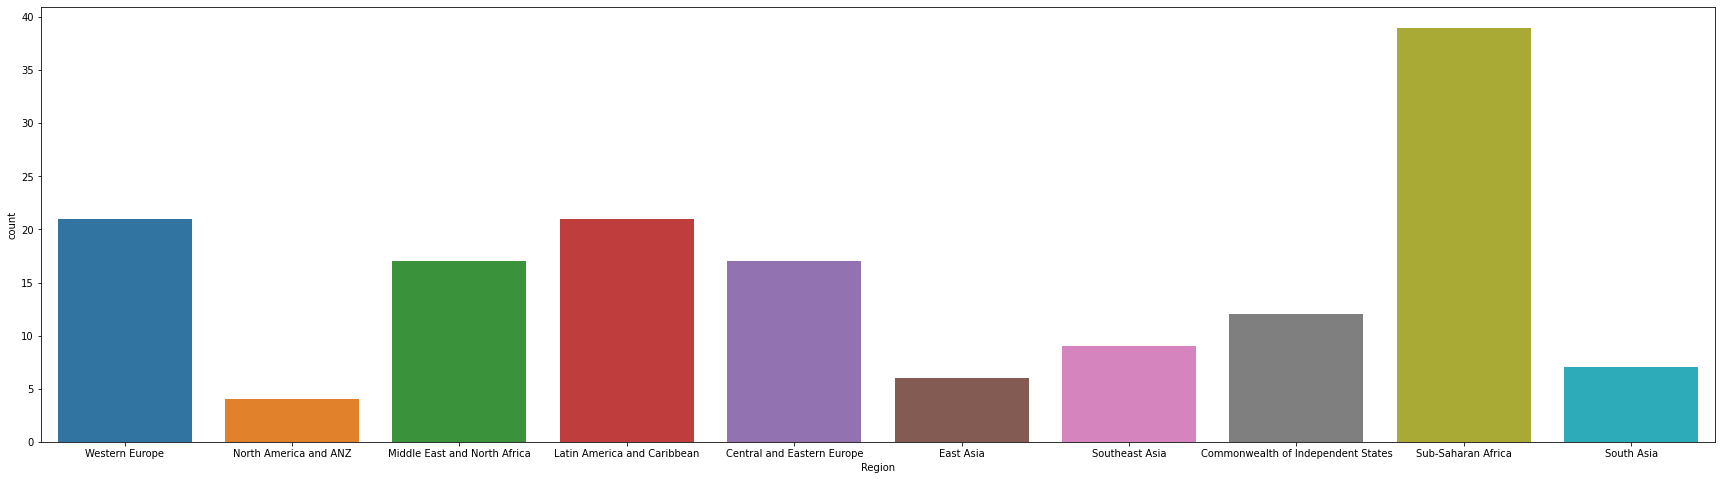

In [ ]:
#regions and number of countries in those regions
kat_df =dw2020.select_dtypes(include=["object"])
RegionZahl = kat_df['Region'].value_counts()
print(RegionZahl)
plt.figure(figsize=(30,8))
sns.countplot(x='Region',data=dw2020)

In [ ]:
WesternEurope = dw2020.loc[dw2020["Region"] == "Western Europe"]
SubSaharanAfrica = dw2020.loc[dw2020["Region"] == "Sub-Saharan Africa"]
LatinAmerica = dw2020.loc[dw2020["Region"] == "Latin America and Caribbean"]
MiddleEast= dw2020.loc[dw2020["Region"] == "Middle East and North Africa"]
CentralEurope = dw2020.loc[dw2020["Region"] == "Central and Eastern Europe"]
Cis= dw2020.loc[dw2020["Region"] == "Commonwealth of Independent States"]
SoutheastAsia = dw2020.loc[dw2020["Region"] == "Southeast Asia"]
SouthAsia = dw2020.loc[dw2020["Region"] == "South Asia"]
EastAsia = dw2020.loc[dw2020["Region"] == "East Asia"]
NorthAmerica = dw2020.loc[dw2020["Region"] == "North America and ANZ"] 

In [ ]:
#Outliers Detection
def detectionOutliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    untere_grenze = Q1- 1.5*IQR
    obere_grenze = Q3 + 1.5*IQR
    print("lower limit is ", untere_grenze)
    print("upper limit is ", obere_grenze)
    print("Q1 =", Q1)
    print("Q3 =", Q3)
    
    outliers= []

    for x in data:
      if x > obere_grenze or x < untere_grenze:
            outliers.append(x)
            return outliers
    if len(outliers) == 0:
      print("No Outliers Exist")

In [ ]:
#Print Outliers
print('Western Europe Economy Outliers')
detectionOutliers(WesternEurope.Wirtschaft)

print('\nSub-Saharan Africa Economy Outliers')
detectionOutliers(SubSaharanAfrica.Wirtschaft)

print('\nLatin America and Caribbean Economy Outliers')
detectionOutliers(LatinAmerica.Wirtschaft)

print('\nCentral and Eastern Europe Economy Outliers')
detectionOutliers(CentralEurope.Wirtschaft)

print('\nCommonwealth of Independent States Economy Outliers')
detectionOutliers(Cis.Wirtschaft)

print('\nSoutheast Asia Economy Outliers')
detectionOutliers(SoutheastAsia.Wirtschaft)

print('\nSouth AsiaEconomy Outliers')
detectionOutliers(SouthAsia.Wirtschaft)

print('\nEast Asia Economy Outliers')
detectionOutliers(EastAsia.Wirtschaft)

print('\nNorth America and ANZ Economy Outliers')
detectionOutliers(NorthAmerica.Wirtschaft)

print('\nMiddle East and North Africa Economy Outliers')
detectionOutliers(MiddleEast.Wirtschaft)

Western Europe Economy Outliers
lower limit is  10.04358912
upper limit is  11.21224832
Q1 = 10.48183632
Q3 = 10.77400112

Sub-Saharan Africa Economy Outliers
lower limit is  6.0047971005
upper limit is  9.5647059685
Q1 = 7.339762926000001
Q3 = 8.229740143

Latin America and Caribbean Economy Outliers
lower limit is  7.615318298000002
upper limit is  11.107284545999999
Q1 = 8.924805641
Q3 = 9.797797203

Central and Eastern Europe Economy Outliers
lower limit is  8.692425725000003
upper limit is  11.328572276999996
Q1 = 9.680980682000001
Q3 = 10.34001732
No Outliers Exist

Commonwealth of Independent States Economy Outliers
lower limit is  7.285055517875
upper limit is  11.238583922875
Q1 = 8.76762866975
Q3 = 9.756010771
No Outliers Exist

Southeast Asia Economy Outliers
lower limit is  7.383762837499997
upper limit is  11.156609057500003
Q1 = 8.79858017
Q3 = 9.741791725

South AsiaEconomy Outliers
lower limit is  6.585680842750002
upper limit is  10.640426516749997
Q1 = 8.1062104705
Q3

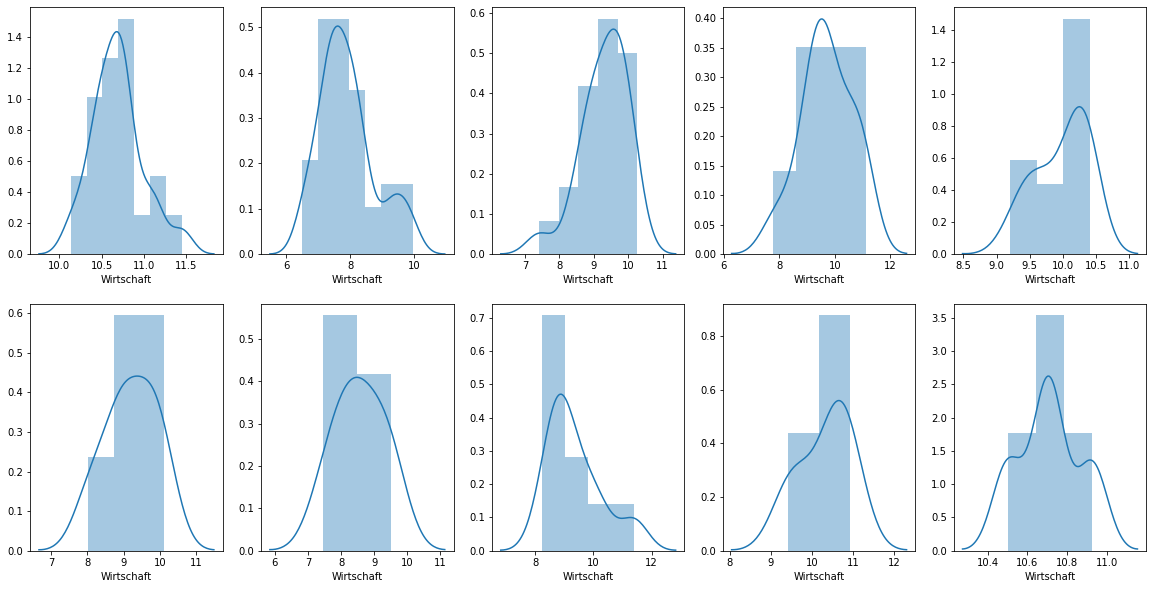

In [ ]:
f , axis = plt.subplots(2,5, figsize = (20,10))
sns.distplot(WesternEurope.Wirtschaft,ax=axis[0,0])
sns.distplot(SubSaharanAfrica.Wirtschaft,ax=axis[0,1])
sns.distplot(LatinAmerica.Wirtschaft,ax=axis[0,2])
sns.distplot(MiddleEast.Wirtschaft,ax=axis[0,3])
sns.distplot(CentralEurope.Wirtschaft,ax=axis[0,4])
sns.distplot(Cis.Wirtschaft,ax=axis[1,0])
sns.distplot(SouthAsia.Wirtschaft,ax=axis[1,1])
sns.distplot(SoutheastAsia.Wirtschaft,ax=axis[1,2])
sns.distplot(EastAsia.Wirtschaft,ax=axis[1,3])
sns.distplot(NorthAmerica.Wirtschaft,ax=axis[1,4])


In [ ]:
trace1 = go.Box(x=WesternEurope.Wirtschaft, name = 'Western Europe')
trace2 = go.Box(x=SubSaharanAfrica.Wirtschaft, name = 'Sub Saharan')
trace3 = go.Box(x=LatinAmerica.Wirtschaft, name = 'Latin America and Caribbean')
trace4 = go.Box(x=MiddleEast.Wirtschaft, name = 'Middle East and North Africa')
trace5 = go.Box(x=CentralEurope.Wirtschaft, name = 'Central and Eastern Europe')
trace6 = go.Box(x=Cis.Wirtschaft, name = 'Commonwealth of Independent States')
trace7 = go.Box(x=SoutheastAsia.Wirtschaft, name = 'Southest Asia')
trace8 = go.Box(x=SouthAsia.Wirtschaft, name = 'South Asia')
trace9 = go.Box(x=EastAsia.Wirtschaft, name = 'East Asia')
trace10 = go.Box(x=NorthAmerica.Wirtschaft, name = 'North America and ANZ')
u = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8,trace9,trace10]
iplot(u)

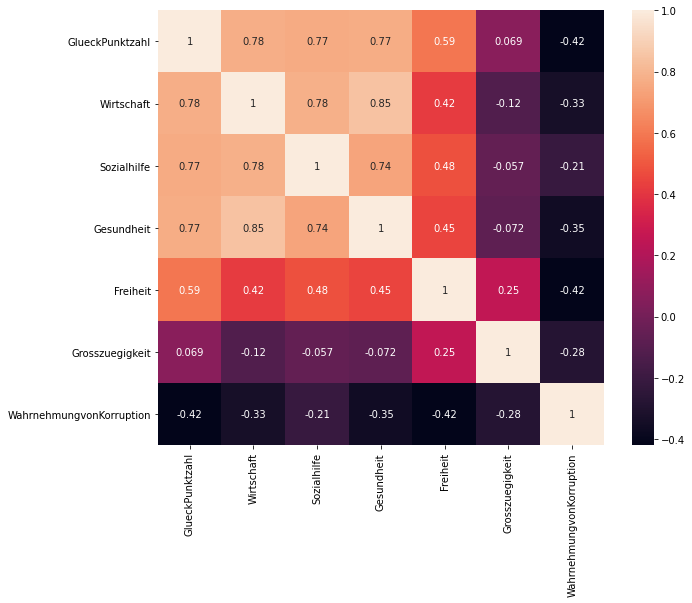

In [ ]:
#heatmap to see the correlation between values
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(dw2020.corr(), annot = True)

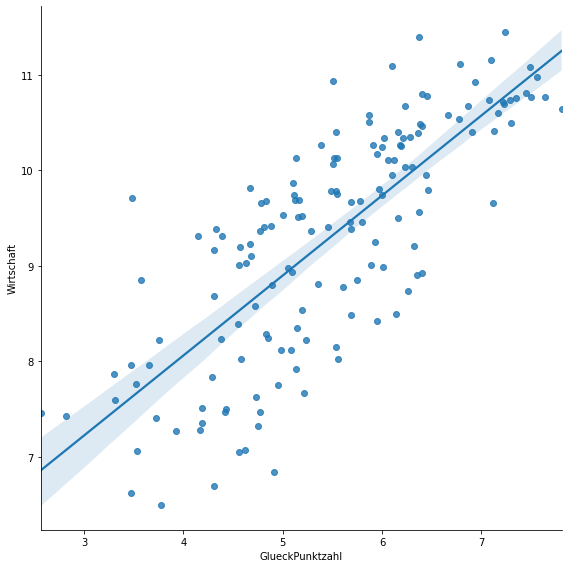

In [ ]:
sns.lmplot(x="GlueckPunktzahl",y= "Wirtschaft",data = dw2020,height=8)

In [ ]:
#Interactive scatterplot and linear regression by region
fig = px.scatter(dw2020, x="GlueckPunktzahl", y="Wirtschaft", color="Region",size='GlueckPunktzahl', hover_data=['Land','Region','GlueckPunktzahl','Wirtschaft','Sozialhilfe','Gesundheit','Freiheit','Grosszuegigkeit','WahrnehmungvonKorruption'],trendline="ols")
fig.show()

#Normalize by a Standart Deviation
All Region

In [ ]:
data = WesternEurope['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = SubSaharanAfrica['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = LatinAmerica['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = MiddleEast['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = CentralEurope['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = Cis['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = SoutheastAsia['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = SouthAsia['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = EastAsia['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
data = NorthAmerica['Wirtschaft']

data_norm_by_std = [number/scipy.std(data) for number in data]

trace1 = go.Histogram(
    x=data,
    opacity=0.75,
    name='data'
)

trace2 = go.Histogram(
    x=data_norm_by_std,
    opacity=0.75,
    name='normalized by std = ' + str(scipy.std(data)),
)

fig = tools.make_subplots(rows=2, cols=1)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(height=600, width=800, title='Normalize by a Standart Deviation')
iplot(fig)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning:

scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead

/usr/local/lib/python3.6/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead

